<a href="https://colab.research.google.com/github/seon0415/BDA/blob/main/230521_6_____1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시계열 데이터 분석
- 시계열이라는 것은 시간의 흐름 시간을 나타내는 것
- 기존의 분석과는 조금 다른 방법이 필요함
- 시계열이라는 것은 시간의 흐름을 나타낸 데이터라서 시간의 흐름을 바꾸면 문제가 될 수 있다.
- 모델링을 진행할 때도 시계열 데이터는 섞을 수 없다. 시계열 자체가 특성이 섞게되면 사라진다.
- 시계열 데이터는 흐름이라는 것이 중요한 특징 중 하나다.

- 대부분 판다스에서 제공하는 datetime, TimeStamp, Timedelta 등 여러가지 제공
- 대부분 datetime을 이용해서 데이터 분석을 진행한다.

- 시계열 데이터를 가지고 분석, 예측도 가능하다.
- 시계열 분석 
- 정상성, 차분 등 시계열분석에 필요한 방법들이 따로 있다.
- 어떠한 경향이나 추세가 보이는 시계열 데이터를 정상시계열로 만든다.

- datetime에 대해서 들어갈 것
- date + time 이 두 가지가 합친 것
- date 연, 월, 일 등으로 이루어졌고, time 시간, 분, 초 ,마이크로초 등 이뤄져 있다.
- Timestamp 날짜와 시간을 모두 가지고 있는 단일 객체
- timedelta는 객체를 가지고 있는데, 시계열 데이터를 덧셈 또는 뺄셈이 가능하다. ( 날짜를 day 계산해서 덧셈과 뺄셈 진행)

##DATETIME

In [12]:
import pandas as pd
import datetime

In [2]:
date = datetime.date(year=2023, month = 5, day =21)
time = datetime.time(hour=22, minute= 6, second =5, microsecond=1234)

In [3]:
date

datetime.date(2023, 5, 21)

In [4]:
time

datetime.time(22, 6, 5, 1234)

In [5]:
dt = datetime.datetime(year=2023, month = 5, day =21,hour=22, minute= 6, second =5, microsecond=1234)

In [6]:
dt

datetime.datetime(2023, 5, 21, 22, 6, 5, 1234)

In [7]:
#timedelta 계산이 가능하다
td = datetime.timedelta(days=20, hours=10)

In [13]:
td

datetime.timedelta(days=20, seconds=36000)

In [14]:
print(date+td)
print(dt+td)

2023-06-10
2023-06-11 08:06:05.001234


- datetime의 좋은점
- datetime을 이용해서 시계열데이터로 바꾼다.

In [11]:
pd.to_datetime('2023-5-21')

Timestamp('2023-05-21 00:00:00')

- 날짜 데이터를 표현하는 방식은 다양하다
- 21-5-2023
- 2023/5/21
- 2023.5.21
- 표현방법이 다양하다.

In [15]:
#datetime의 좋은 점
a = pd.Series(['2023-5-21','21/5/2023','2023-6-21','2023-07-19','2023-05-32'])

In [16]:
pd.to_datetime(a,dayfirst=True,errors='coerce') #에러의경우 즉 정상적이지 않은 시계열 값은 na 반환 

0   2023-05-21
1   2023-05-21
2   2023-06-21
3   2023-07-19
4          NaT
dtype: datetime64[ns]

- datetime이 반환해주는 형태가 있다.
- 이형태는 연도랑, 월, 일을 잘 스스로 매핑해주고 잘못된 월 같은경우는 na값을 반환한다.
- 연도-월-일
- 이형태로 잘 되어있어야 datetime이 인식한다.

## 실제 데이터를 불러와서 분석해 보자!

In [17]:
crime= pd.read_csv('crime.csv')

###데이터 확인, 날짜확인

- 데이터의 타입이 시계열데이터인지 꼭 확인해야 한다!

In [18]:
crime.info()
#문자열 데이터를 시계열 데이터로 꼭 봐꿔야 한다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112484 entries, 0 to 112483
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           112484 non-null  int64  
 1   OFFENSE_TYPE_ID      112484 non-null  object 
 2   OFFENSE_CATEGORY_ID  112484 non-null  object 
 3   REPORTED_DATE        112484 non-null  object 
 4   GEO_LON              111363 non-null  float64
 5   GEO_LAT              111363 non-null  float64
 6   NEIGHBORHOOD_ID      112483 non-null  object 
 7   IS_CRIME             112483 non-null  float64
 8   IS_TRAFFIC           112483 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.7+ MB


In [19]:
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0.0,1.0
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1.0,0.0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1.0,0.0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1.0,0.0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...,...
112479,112479,disturbing-the-peace,public-disorder,2014-05-15 01:00:00,-104.985207,39.745592,north-capitol-hill,1.0,0.0
112480,112480,assault-dv,other-crimes-against-persons,2016-01-06 16:48:00,-104.943780,39.756283,skyland,1.0,0.0
112481,112481,criminal-mischief-mtr-veh,public-disorder,2015-08-09 01:43:00,-104.995290,39.751829,union-station,1.0,0.0
112482,112482,burglary-business-no-force,burglary,2015-02-25 11:34:00,-104.992012,39.755063,five-points,1.0,0.0


In [20]:
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0.0,1.0
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1.0,0.0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1.0,0.0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1.0,0.0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...,...
112479,112479,disturbing-the-peace,public-disorder,2014-05-15 01:00:00,-104.985207,39.745592,north-capitol-hill,1.0,0.0
112480,112480,assault-dv,other-crimes-against-persons,2016-01-06 16:48:00,-104.943780,39.756283,skyland,1.0,0.0
112481,112481,criminal-mischief-mtr-veh,public-disorder,2015-08-09 01:43:00,-104.995290,39.751829,union-station,1.0,0.0
112482,112482,burglary-business-no-force,burglary,2015-02-25 11:34:00,-104.992012,39.755063,five-points,1.0,0.0


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


- 해당 시계열 데이터 값이 datetime로 꼭 변경이 되어야만 시계열 데이터로 사용할 수 있다!

### set_index(해당시계열 데이터 컬럼을 인덱스로 지정)

In [21]:
crime_dt =crime.set_index('REPORTED_DATE')
crime_dt 

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0.0,1.0
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1.0,0.0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1.0,0.0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1.0,0.0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-05-15 01:00:00,112479,disturbing-the-peace,public-disorder,-104.985207,39.745592,north-capitol-hill,1.0,0.0
2016-01-06 16:48:00,112480,assault-dv,other-crimes-against-persons,-104.943780,39.756283,skyland,1.0,0.0
2015-08-09 01:43:00,112481,criminal-mischief-mtr-veh,public-disorder,-104.995290,39.751829,union-station,1.0,0.0


### 연도에 따라 추출할 수 있음(시계열 데이터 컬럼을 인덱스로 지정)

In [ ]:
crime_dt.loc['2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2014-01-21 07:32:00,457344,traffic-accident,traffic-accident,-104.998902,39.711204,baker,0,1
2014-05-22 10:55:00,457385,harassment-dv,public-disorder,-104.905262,39.724593,hilltop,1,0
2014-01-20 17:27:00,457769,traffic-accident,traffic-accident,-104.968227,39.739752,cheesman-park,0,1


In [ ]:
crime_dt.loc['2017']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-05-22 14:41:00,7261,traffic-accident,traffic-accident,-104.673812,39.849292,dia,0,1
2017-05-17 20:35:00,7262,threats-to-injure,public-disorder,-105.020053,39.694351,ruby-hill,1,0
2017-06-07 07:47:00,7265,burglary-residence-by-force,burglary,-104.981677,39.763597,five-points,1,0
2017-05-26 16:46:00,7270,theft-other,larceny,-104.839119,39.769694,stapleton,1,0
2017-06-07 07:42:00,7272,criminal-trespassing,all-other-crimes,-104.673812,39.849292,dia,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [ ]:
#추가로 요일을 더 지정할 수 있다.
crime_dt.loc['2017-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-17 02:13:00,89011,aggravated-assault,aggravated-assault,-104.990480,39.728076,lincoln-park,1,0
2017-09-18 13:30:00,112711,criminal-mischief-mtr-veh,public-disorder,-104.989896,39.753590,five-points,1,0
2017-09-12 15:59:00,134270,traffic-accident,traffic-accident,-104.940906,39.742085,city-park,0,1
2017-09-26 21:17:00,191519,traf-other,all-other-crimes,-105.008656,39.711201,athmar-park,1,0
2017-09-10 11:30:00,193934,aggravated-assault,aggravated-assault,-105.049447,39.700059,westwood,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [ ]:
#추가로 요일을 더 지정할 수 있다.
crime_dt.loc['2017-09-13']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-13 13:06:00,451665,fraud-identity-theft,white-collar-crime,-105.007308,39.788123,chaffee-park,1,0
2017-09-13 11:12:00,452119,theft-other,larceny,-104.910155,39.740532,south-park-hill,1,0
2017-09-13 16:00:00,453375,traffic-accident,traffic-accident,-104.913986,39.743406,south-park-hill,0,1
2017-09-13 11:50:00,453519,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.886145,39.738479,east-colfax,1,0
2017-09-13 13:05:00,453935,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.025060,39.678635,harvey-park,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 02:21:00,460867,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0
2017-09-13 03:21:00,460879,traffic-accident-dui-duid,traffic-accident,-105.010711,39.757385,highland,0,1
2017-09-13 02:15:00,460889,traffic-accident-hit-and-run,traffic-accident,-105.043950,39.787436,regis,0,1


In [ ]:
crime_dt.loc['Dec 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-12-19 17:42:00,1219,traffic-accident,traffic-accident,-104.940355,39.781688,northeast-park-hill,0,1
2014-12-06 08:25:00,1225,disturbing-the-peace,public-disorder,-104.817529,39.773653,montbello,1,0
2014-12-19 08:29:00,1301,burglary-residence-no-force,burglary,-104.901114,39.729047,lowry-field,1,0
2014-12-01 22:13:00,1322,liquor-possession,drug-alcohol,-104.966870,39.738576,cheesman-park,1,0
2014-12-30 08:26:00,1341,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037817,39.771111,berkeley,1,0
...,...,...,...,...,...,...,...,...
2014-12-18 22:36:00,377801,criminal-trespassing,all-other-crimes,-104.999197,39.739042,lincoln-park,1,0
2014-12-10 19:35:00,377834,assault-simple,other-crimes-against-persons,-105.033088,39.706098,westwood,1,0
2014-12-16 13:51:00,379049,assault-simple,other-crimes-against-persons,-104.921734,39.753780,north-park-hill,1,0


In [ ]:
crime_dt.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0
2014-12-31 23:59:00,148309,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0


### Between_time, at_time

In [22]:
crime_dt14=crime_dt.loc['2014'].sort_index()

In [23]:
crime_dt14.between_time('13:00','17:00') #시간을 가지고도 추출할 수 있다.

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0.0,1.0
2014-01-01 15:11:00,6387,theft-other,larceny,-104.983940,39.740330,north-capitol-hill,1.0,0.0
2014-01-01 15:25:00,78818,theft-items-from-vehicle,theft-from-motor-vehicle,-104.861679,39.658202,kennedy,1.0,0.0
2014-01-01 15:40:00,99848,traffic-accident,traffic-accident,-104.994970,39.768017,globeville,0.0,1.0
2014-01-01 16:01:00,95974,traf-other,all-other-crimes,-104.898653,39.748633,stapleton,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 14:07:00,83415,traffic-accident-hit-and-run,traffic-accident,-104.988903,39.746380,cbd,0.0,1.0
2014-12-31 14:36:00,110173,violation-of-court-order,all-other-crimes,-104.929293,39.675897,goldsmith,1.0,0.0
2014-12-31 15:40:00,101934,traffic-accident-hit-and-run,traffic-accident,-105.029844,39.732940,villa-park,0.0,1.0


- 해당 정각 시간에 대한 데이터를 뽑고 싶은 경우
- at_time

In [ ]:
crime_dt14.at_time('16:49')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-08 16:49:00,201010,traffic-accident,traffic-accident,-104.851718,39.768331,stapleton,0,1
2014-01-18 16:49:00,159782,traffic-accident,traffic-accident,-105.053239,39.733105,villa-park,0,1
2014-01-18 16:49:00,292755,theft-other,larceny,-105.004929,39.710900,athmar-park,1,0
2014-01-28 16:49:00,153133,traffic-accident,traffic-accident,-104.994952,39.765683,globeville,0,1
2014-02-04 16:49:00,229613,traffic-accident,traffic-accident,-104.884606,39.657791,hampden,0,1
...,...,...,...,...,...,...,...,...
2014-12-02 16:49:00,245051,theft-other,larceny,-104.999293,39.752085,union-station,1,0
2014-12-14 16:49:00,217437,burglary-business-by-force,burglary,-104.975748,39.740222,north-capitol-hill,1,0
2014-12-16 16:49:00,129733,theft-items-from-vehicle,theft-from-motor-vehicle,-105.025552,39.731396,villa-park,1,0


##  필수과제1
- 시계열데이터 문법
- offsets, first 근로기준의 날 뽑을 수도 있고, 첫주의 월요일만 뽑을 수 있고 
- 리서치 하셔서 정리하시고 최소 5개 이상 문법 찾아서 코드와 주석처리 해주시면 됩니다.

- 시계열 데이터 컬럼이 있는 순간 옆에 있는 다른 컬럼들은 다양한 의미를 가지게 된다.
- 시계열이라는 흐름을 통해서 매출이나, 영업이익 등이 있으면 시간흐름에 따른 비교 변화 가능하다.
- 범죄 데이터, 범죄 건수가 어떤 식으로 변화하느지도 알 수 있다. 
- 시계열 특성을 가지고 다른 컬럼들을 비교 분석해보자!

##resample(일별, 주별, 월별 계산)

In [ ]:
crime_dt =crime.set_index('REPORTED_DATE')

In [ ]:
crime_dt14=crime_dt.loc['2014'].sort_index()

In [ ]:
crime_dt14.first('5D')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-01-05 23:21:00,248473,traffic-accident,traffic-accident,-104.979160,39.779675,globeville,0,1
2014-01-05 23:28:00,235140,weapon-carrying-concealed,all-other-crimes,-104.815367,39.793922,montbello,1,0
2014-01-05 23:28:00,235141,drug-cocaine-possess,drug-alcohol,-104.815367,39.793922,montbello,1,0


- resample 함수

In [28]:
# 월별, 일별, 주별 값을 계산해 준다.
crime_sp=crime_dt14[['IS_CRIME']]
crime_sp.resample('W').sum()

,IS_CRIME
REPORTED_DATE,
2014-01-05,120.0
2014-01-12,233.0
2014-01-19,205.0
2014-01-26,198.0
2014-02-02,141.0
2014-02-09,143.0
2014-02-16,196.0
2014-02-23,190.0
2014-03-02,316.0


In [ ]:
# 주별 값을 계산해 준다.
crime_sp14=crime_dt14[['IS_CRIME','IS_TRAFFIC']]
crime_sp14.resample('W').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,619,268
2014-01-12,1023,397
2014-01-19,1102,327
2014-01-26,1082,351
2014-02-02,917,439
2014-02-09,948,481
2014-02-16,1258,394
2014-02-23,1315,358
2014-03-02,1151,404


In [ ]:
# 월별 값을 계산해 준다.
crime_sp14.resample('M').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-31,4557,1680
2014-02-28,4580,1646
2014-03-31,5350,1695
2014-04-30,5043,1671
2014-05-31,5401,1765
2014-06-30,5389,1789
2014-07-31,5731,1862
2014-08-31,5921,1899
2014-09-30,5690,1973


In [ ]:
# 월별, 일별, 주별 값을 계산해 준다.
crime_sp14.resample('Y').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,62690,21763


<Axes: xlabel='REPORTED_DATE'>

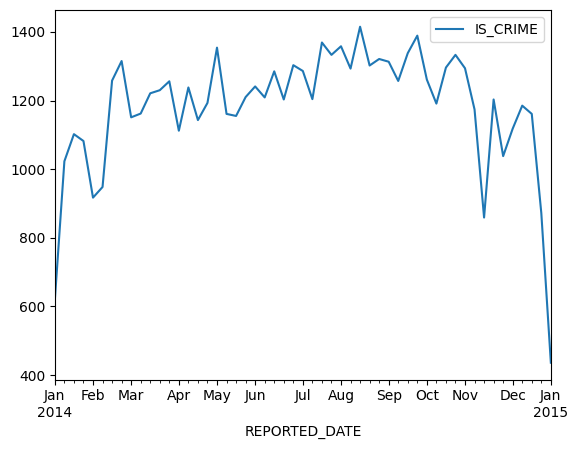

In [ ]:
crime_spw.plot()

## 시계열 데이터 분석 ( 예측 )



- 시계열데이터분석은 과거 데이터를 기반으로 미래를 예측하는 것
- 과거 패턴을 학습하여서 미래를 예측한다.
- 과거 데이터 패턴이 예측할 수 없을만큼 변동이 심하면 미래를 예측하기 쉬울까요? 어렵겠죠
- 시계열 데이터는 기본적으로 과거의 패턴으로 학습하기 때문에 과거의 데이터가 최대한 변화가 많지 않고 안정적으로 정상성이 있어야 한다.

- 정상성(Stationarity) - 추세나, 계절이나, 다양 원인 때문에 이런 것들 제거하고 정상시계열로 만들어 준다.
- 과거에 데이터를 통해서 배우는데 과거 데이터가 예측할 수 없는 다양한 추세나 계절이 있다면 미래를 예측하는데 틀릴 확률이 높다.
- 정상시계열에 추가적으로 계절성 요인을 더하거나, 추세나 이런 걸 더해서 만드는 것이 SARIMA

- AR/MA
- AR 자기회귀모델 
- MA 이동평균모델

- 시계열데이터분석시 ARIMA = AR + MA + 차분 기본 모델
- ARIMA 모델
- 정상성 차분을 통해서 만들어서 미래를 예측하는데 미래에 대한 예측이 길어지면 과거 5년 데이터를 가지고 10, 15년 정도를 예측한다?
- 평균으로 회귀 
- 단기예측에 적합
- 다양한 요인이 발생하면 오차가 발생할 수 밖에 없다.

## 어려운 시계열분석을 하지 않아도

- 쉽게 시계열 데이터 분석을 할 수 있는 방법

- 페이스북에서 제공하는 prophet , 분석가가 차분진행하고, 통계적인 것을 검정할 필요 없이 자동으로 해준다.
- prophet 쉽게 사용할 수 있다.

In [ ]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


- 다음시간은 실제 prophet을 이용해서 미래 데이터를 예측하는 것을 진행!

In [ ]:
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


## 필수과제2 
- crime 데이터를 가지고 시계열 데이터 분석을 진행해 주세요.
- 제공된 컬럼을 가지고 범죄건과 비교해서 시계열 데이터 분석을 진행해 주세요!
- ex) OFFENSE_TYPE_ID 해당 컬럼과 범죄건수와 시계열적인 패턴까지 다 엮어서 어떤식으로 되는지 비교분석이 가능하다.